**library import**

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

**Data import**

In [95]:
path = r"C:\Users\BrechtDewilde\Documents\Github\BDProject\data\data.csv"
data = pd.read_csv(path, index_col = 0)
y = data["concentration"]
x = data[[i for i in data.columns if i != "concentration"]]
x = pd.get_dummies(x)

**Baseline model** <br/> Is this much better than the other models?

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

984.0767209172122

**RandomForest with feature importance** <br/> The higher the number the more important the feature. These importances will add up to one.

In [107]:
regr = RandomForestRegressor(max_depth = 1, n_estimators = 10).fit(x, y)
importances = regr.feature_importances_
indices = []
for pos, val in enumerate(importances):
    if val == 0:
        indices.append(pos)
x = x.drop(x.columns[indices[:-6]], axis = 1)

**Bagging** <br/> Determine the optimal amount of max_depth.

In [114]:
kfold = model_selection.KFold(n_splits=10, random_state= 0)
outer_results = []
for depth in range(10, 30, 1):
    regr = BaggingRegressor(base_estimator = DecisionTreeRegressor(random_state=0, max_depth = depth), n_estimators = 10)
    results = model_selection.cross_val_score(regr, x_train, y_train, cv=kfold, scoring =  'neg_mean_squared_error')
    outer_results.append(abs(results.mean()))

Text(0.5, 1.0, 'The evolution of the MSE according to the max depth of each individual tree.')

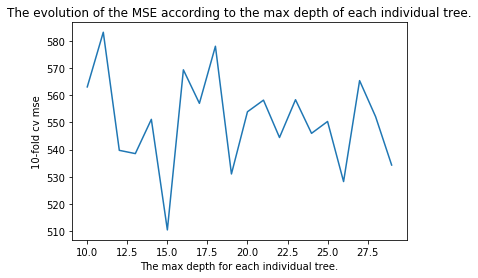

In [115]:
fig, ax = plt.subplots()
ax.plot(list(range(10, 30, 1)), outer_results)
ax.set_xlabel("The max depth for each individual tree.")
ax.set_ylabel("10-fold cv mse")
ax.set_title("The evolution of the MSE according to the max depth of each individual tree.")

Determining the best amount of trees.

In [117]:
outer_results = []
for estimators in range(100, 500, 100):
    regr = BaggingRegressor(base_estimator = DecisionTreeRegressor(random_state=0, max_depth = 15), n_estimators = estimators)
    results = model_selection.cross_val_score(regr, x_train, y_train, cv=kfold, scoring =  'neg_mean_squared_error')
    outer_results.append(abs(results.mean()))

KeyboardInterrupt: 

In [118]:
outer_results

[481.59771015180667, 483.101777601181]

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(range(10, 30, 1)), outer_results)
ax.set_xlabel("The max depth for each individual tree.")
ax.set_ylabel("10-fold cv mse")
ax.set_title("The evolution of the MSE according to the max depth of each individual tree.")